# Visualizing the Data

In this lesson, we will introduce techniques to

* **customize the plots** to emphasize the message that we would like to convey, and
* **create more advanced types of plots**.

For further details, see

* [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
    in the _Pandas Documentation_
* [Seaborn documentation](https://seaborn.pydata.org/)
* [Visualization with Matplotlib](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb)
    in the _Python Data Science Handbook_

In [1]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

## Concepts and terminology for plotting

You should know a few things about `matplotlib`:

* With `matplotlib` you **build up a plot in a sequence of steps**,
    where each step adds _plot elements_ to the _**current figure**_.
* In a Jupyter notebook (like this one),
    such a plot must be built up in a **single code cell**.
* When that code cell is executed,
    * the _current figure_ is **automatically cleared and initialized** at the beginning, and
    * the resulting plot is **automatically shown** at the end.
* Therefore, you **do _not_ call `plt.figure()` or `plt.show()`** in a Jupyter notebook.
    (You will often see these commands when browsing the web for solutions.
    Don't use them.)

The image on the right shows some standard terminology for plot elements.

* **Figure**: refers to the whole figure,
    possibly consisting of multiple plots ('*axes*') arranged in a grid
* **Axes** (plural): an actual plot visualizing data in its central area,
    bounded by _spines_ that show _axis_ information;
    not to be confused with just the $x$- and $y$-axis
* **Axis** (singular): information that defines the relationship between data values and
    horizontal or vertical offsets in the plot
* **Spine**: a line on the boundary with reference information obtained from an _axis_
* **Major and minor ticks**: longer and shorter lines marking off positions on a _spine_
* **Major and minor tick labels**: numeric or textual labels of _ticks_
* **Axis label**: a textual label of an _axis_
* **Title**: textual label of a plot
* **Grid**: auxiliary reference lines derived from each _axis_
* **Line** and **markers**: visualizations of data values
* **Legend**: overview that associates text with visual elements for data

Also see the `matplotlib` [Usage Guide](https://matplotlib.org/tutorials/introductory/usage.html).
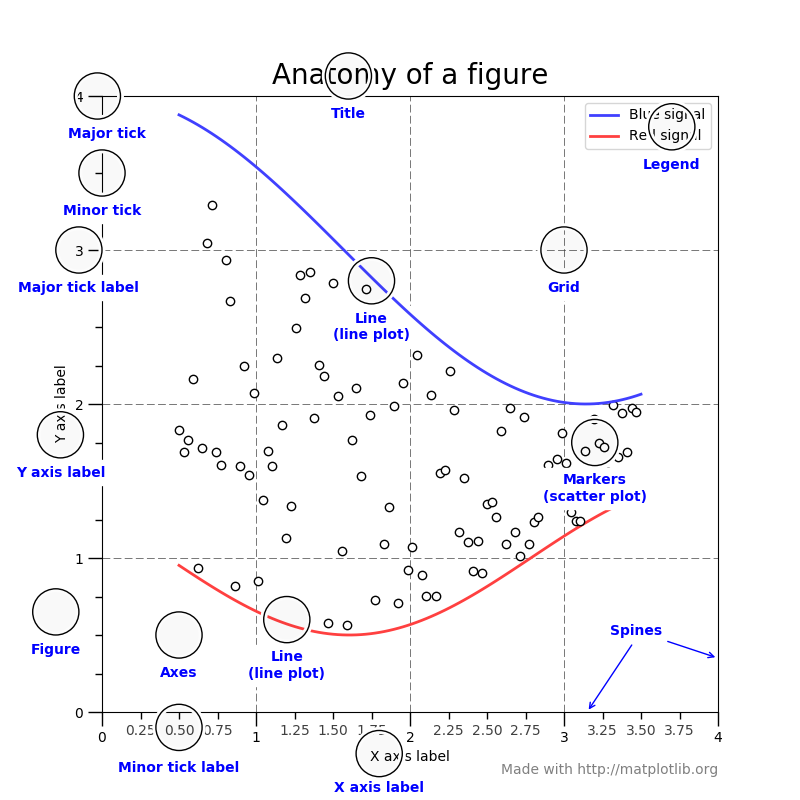

## Best practices for plotting <span id="best_practices"></span>

A visualization can be a great way to communicate your results. But all too often communication is broken because the reader cannot understand the visualization. As a main rule, always ensure it is easy for your intended audience to interpret your plot, even if they do not have your knowledge about how the plot is created and what it is representing. In general, it will help if you follow the following "best practices" for visualization.

* Include a descriptive **title** for your plot.
* Make sure your plot has **labels** on the $x$- and $y$-axis. Include the **units** of the quantities on the axes if applicable.
* Choose the **right plot** for the results that you are presenting. E.g., sometimes a line plot is a good choice, but in other cases a bar chart is much better.
* Ensure that the plot is **readable**, for instance that the letters are not too small, and lines are not too thin. Usually, your plot is used in a different environment from where you create it. For instance, you create the plot in a notebook, but use it on a poster. It is important that you optimize your plot for the final environment.
* Ensure that your plot is also understandable for somebody who is color-blind.
* Avoid misleading the reader.
* Choose appropriate ranges for the axes of your plot. For instance, if you make a plot of a positive quantity, the range of the $y$-axis should not contain negative values.
* Include a **legend**, in particular when combining several plots.
* Include a **caption** for your plot, when you include your plot in another document.

---

# <span class="section">1.</span> Basic Line Graphs using Pandas

## Learning Objectives of This Section

After this section, you should

* understand the basics of plotting with Pandas and Matplotlib
    for **communication to others**
* know how to add a **title**, **axis labels**, and **legend** to a plot
* know how to **save a plot** to a file
* know how to adjust plot **style** and **color**
* know how to add **text** and **annotation** to plots
* know how to **combine multiple plots**
* know how to make scatter plots with **alpha, color, and size settings**
* know how to create a **scatter matrix**
* know how to **modulate a scatter plot** by dot color and dot size

## Stock Data

We will illustrate the various visualization possibilities with a dataset containing the closing prices of selected stocks. We first read the data into a dataframe `df_stocks_0`. We add the keyword argument `parse_dates=[0]` to the `read_csv` function so `pandas` knows that the zeroth column should be interpreted as dates. 

In [17]:
df_stocks_0 = pd.read_csv('./data/stocks-monthly.csv',parse_dates=[0])
df_stocks_0.head()

,Date,NASDAQ,AMZN,GOOG,MSFT
0,2007-01-31,2463.929932,37.669998,249.129654,30.860001
1,2007-02-28,2416.149902,39.139999,223.272827,28.170000
2,2007-03-30,2421.639893,39.790001,227.599686,27.870001
3,2007-04-30,2525.090088,61.330002,234.166977,29.940001
4,2007-05-31,2604.520020,69.139999,247.346252,30.690001


The data set contains five columns. The `'AMZN'`, `'GOOG'` and `'MSFT'` columns contain the closing price, in USD, for the stocks of Amazon, Google and Microsoft respectively. The closing prices are measured on the dates in the `'Date'` column, and those dates correspond to the last (trading) days of the month. The `'NASDAQ'` column contains the closing price of the NASDAQ composite index. This is a number calculated by taking a weighted average over various stocks, and is an indicator of how the market is performing. 

## A simple plot

First, we create a line plot for the `'NASDAQ'` column of the `Stocks' dataset
(see the EDA lesson):

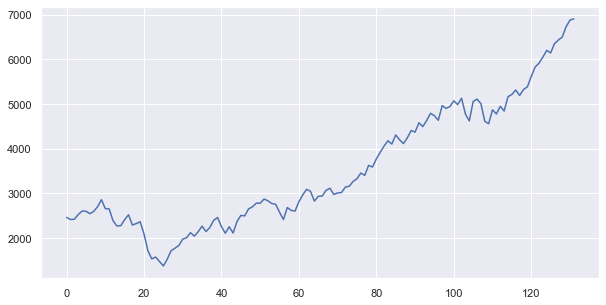

In [18]:
df_stocks_0['NASDAQ'].plot();

You get a single **figure** with a single plot (**axes**) consisting of a colored **line**.  
This plot automatically includes 
* numeric **tick labels** on the $x$-axis and $y$-axis 
* a **grid** (thanks to importing and using Seaborn).

There are many issues with this plot. One issue needs immediate attention: the drawn curve should show the development of the NASDAQ composite index over time, but on the $x$-axis we only see integers. This is because the `'NASDAQ'` column is plotted against the index, instead of the dates. One way to fix this is to set the `'Date'` column as the new index for the dataframe.

In [19]:
df_stocks = df_stocks_0.set_index('Date')
df_stocks.head()

,NASDAQ,AMZN,GOOG,MSFT
Date,,,,
2007-01-31,2463.929932,37.669998,249.129654,30.860001
2007-02-28,2416.149902,39.139999,223.272827,28.170000
2007-03-30,2421.639893,39.790001,227.599686,27.870001
2007-04-30,2525.090088,61.330002,234.166977,29.940001
2007-05-31,2604.520020,69.139999,247.346252,30.690001


Let us recreate the plot of the `'NASDAQ'` column.

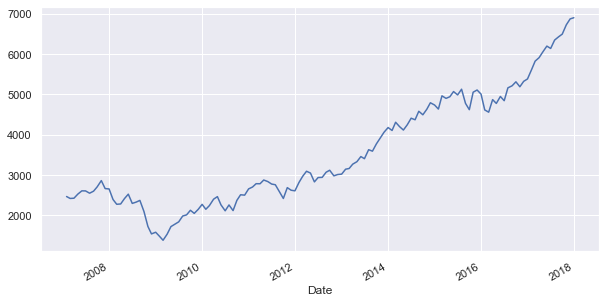

In [20]:
df_stocks['NASDAQ'].plot();

The **semicolon** ('**`;`**') at the end of the line in the code cell above
suppresses showing of the execution result
(but it does not suppress showing of the plot).

That execution result is an **`AxesSubplot`** object.
When shown, it would look like this:
```
<matplotlib.axes._subplots.AxesSubplot at 0x...>
```
The returned object provides an `Axes` object that can be used to add further plot elements. All Pandas and Seaborn plotting functions return such an `Axes` object.

## Title, axis labels, legend

We can store the result of a `.plot()` call in a variable. It is customary to name this variable `ax` or `axes`, but it can be any other name. We can then use this variable to add elements to the plot, such as a **title**, **axis labels**, and a **legend**.

This variable can then be used as follows to add certain plot elements.

* **`ax.set_title(string, ...)`** : set the plot's title
* **`ax.set_xlabel(string, ...)`** : set the $x$-axis label
* **`ax.set_ylabel(string, ...)`** : set the $y$-axis label
* **`ax.legend(list_of_strings)`** : add a legend, one string per column plotted

The functions `ax.set_...` can take additional keyword arguments:

* **`size=...`** (a number, font size in points)
* **`weight=...`** (a string, font weight, e.g. `'bold'`)

Finally, the size of the _tick labels_ can be modified by writing

* **`ax.tick_params(labelsize=...)`**

This can be very useful when otherwise the letters may be too small to read. For details see: [Text properties and layout](https://matplotlib.org/users/text_props.html).

We create again a plot of the `'NASDAQ'` column, but now with additional information,
using the variable `ax_nasdaq` (which we will refer to later):

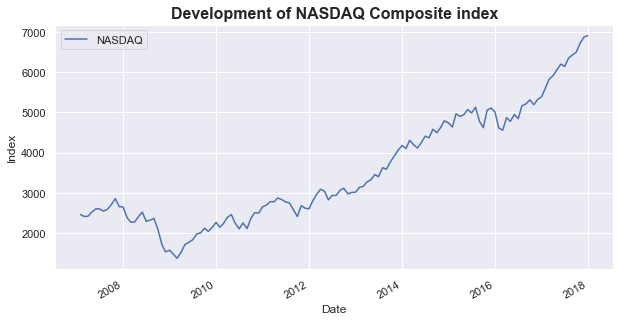

In [21]:
ax_nasdaq = df_stocks['NASDAQ'].plot()
ax_nasdaq.set_title("Development of NASDAQ Composite index", size=16, weight='bold')
ax_nasdaq.set_xlabel('Date')
ax_nasdaq.set_ylabel("Index")
ax_nasdaq.legend(['NASDAQ']);

### Exercise <span class="exercise">1</span>

Create a plot of the price of the Google stock with respect to the date. Make sure your plot has a title and contains the labels `'Date'` for the $x$-axis and `'Price (USD)'` for the $y$-axis. Add also a legend with a single `'GOOG'` element.


In [22]:
###implement the solution to Exercise 1 here


## Saving a plot

You can **save a plot to a file** by writing as last statement in the code cell:

* **`plt.savefig(file_name)`**

The call `plt.savefig()` **must appear in the same code cell** that constructed the plot.

If you captured the result of the plot call in variable `ax`,
then you can also do (possibly in a later code cell):

* **`ax.get_figure().savefig(file_name)`**

In [23]:
ax_nasdaq.get_figure().savefig('NASDAQ-composite.png')

Check that this file was created (in the same directory as this notebook),
and that it contains the expected plot.

> NOTE: The **extension** of the file name will determine the **file format**. Many common file formats are supported, including: pdf, png, ps, svg.

## Line styles, colors, marker styles

There are many options to change the appearance of a **line plot**. For instance, you can vary the **line style**, **marker style**, and **color**.

### Line styles

To obtain an overview of all **supported line styles**, execute the following code cell:

In [24]:
mpl.lines.lineStyles

{'-': '_draw_solid',
 '--': '_draw_dashed',
 '-.': '_draw_dash_dot',
 ':': '_draw_dotted',
 'None': '_draw_nothing',
 ' ': '_draw_nothing',
 '': '_draw_nothing'}

Here is the same plot with a **dotted** line:

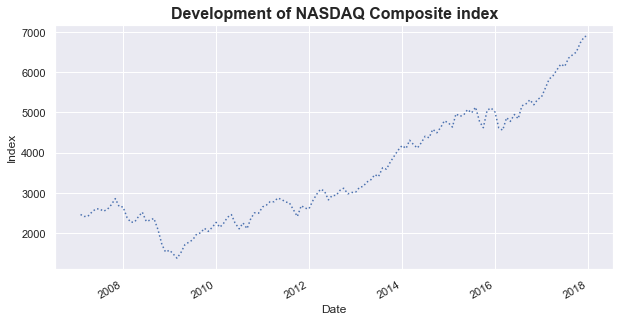

In [25]:
ax_nasdaq = df_stocks['NASDAQ'].plot(linestyle=':')

ax_nasdaq.set_title("Development of NASDAQ Composite index", size=16, weight='bold')
ax_nasdaq.set_ylabel("Index");

The **line width** can be set with the keyword argument **`linewidth=...`** (similar to the keyword argument **`size=16`** above).

### Marker styles

To obtain an overview of all **supported marker styles**, execute the following code cell:

In [26]:
mpl.markers.MarkerStyle.markers

{'.': 'point',
 ',': 'pixel',
 'o': 'circle',
 'v': 'triangle_down',
 '^': 'triangle_up',
 '<': 'triangle_left',
 '>': 'triangle_right',
 '1': 'tri_down',
 '2': 'tri_up',
 '3': 'tri_left',
 '4': 'tri_right',
 '8': 'octagon',
 's': 'square',
 'p': 'pentagon',
 '*': 'star',
 'h': 'hexagon1',
 'H': 'hexagon2',
 '+': 'plus',
 'x': 'x',
 'D': 'diamond',
 'd': 'thin_diamond',
 '|': 'vline',
 '_': 'hline',
 'P': 'plus_filled',
 'X': 'x_filled',
 0: 'tickleft',
 1: 'tickright',
 2: 'tickup',
 3: 'tickdown',
 4: 'caretleft',
 5: 'caretright',
 6: 'caretup',
 7: 'caretdown',
 8: 'caretleftbase',
 9: 'caretrightbase',
 10: 'caretupbase',
 11: 'caretdownbase',
 'None': 'nothing',
 None: 'nothing',
 ' ': 'nothing',
 '': 'nothing'}

Here is the same plot with **octagons** as markers:

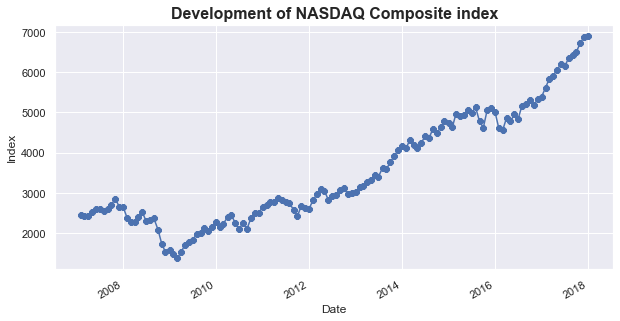

In [27]:
ax_nasdaq = df_stocks['NASDAQ'].plot( marker='8' )

ax_nasdaq.set_title('Development of NASDAQ Composite index', size=16, weight='bold')
ax_nasdaq.set_ylabel('Index');

This looks pretty terrible, because there are way too many markers. 

For this plot, it seems better to not use any markers at all.

There could be some alternative options. The **marker size** can be varied with the keyword argument **`markersize=...`**. Or, we can specify to only mark every $6$th point in the data set by adding the keyword argument **`markevery=6`**.


### Colors

To obtain an overview of all **supported base colors** and their RGB values,
execute the following code cell:

In [28]:
mpl.colors.BASE_COLORS

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}

The letters are abbreviations for:

* **`'b'`** : blue
* **`'c'`** : cyan
* **`'g'`** : green
* **`'k'`** : black
* **`'m'`** : magenta
* **`'r'`** : red
* **`'w'`** : white
* **`'y'`** : yellow

Here is the same plot with a **solid red line**:

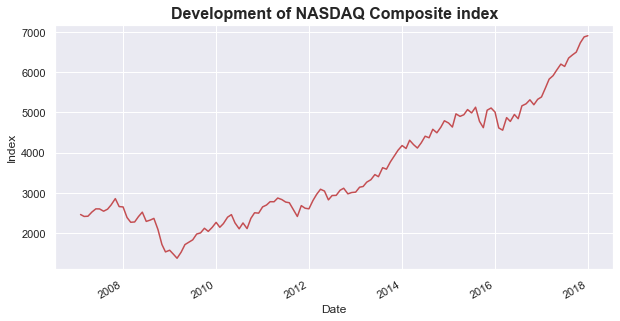

In [29]:
ax_nasdaq = df_stocks['NASDAQ'].plot(color="r")

ax_nasdaq.set_title('Development of NASDAQ Composite index', size=16, weight='bold')
ax_nasdaq.set_ylabel("Index");

There are also **full color names** for more subtle variations. To obtain an overview of all **supported full color names** and their RGB hex values,
execute the following code cell.
It is best to use the _color name_ instead of the hex value.  
(WARNING: This is a long overview.)

In [30]:
mpl.colors.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

There is a way to **limit the plot range** by using

* **`ax.set_xlim(min, max)`**
* **`ax.set_ylim(min, max)`**

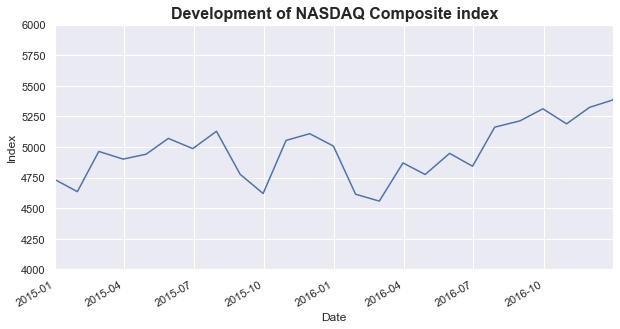

In [31]:
ax_nasdaq = df_stocks['NASDAQ'].plot()
ax_nasdaq.set_title("Development of NASDAQ Composite index", size=16, weight='bold')
ax_nasdaq.set_ylabel("Index")

ax_nasdaq.set_ylim(4000,6000)
ax_nasdaq.set_xlim('2015-01-01', '2016-12-31');

> **NOTE:** When specifying dates, use the convention `'year-month-day'` (e.g. `'2016-12-31'`). Specifying dates in the opposite order `'day-month-year'` (e.g. `'31-12-2016'`) may lead to inconsistent behavior.

The **size of a plot** can be set for a single plot
by supplying the keyword argument **`figsize=(Width, Height)`** to the `plot` function, note that both the width and the height are measured in inches. 

We set the size of the axis and tick labels below by hand. Otherwise they would be too small in comparison, because the figure is so large.

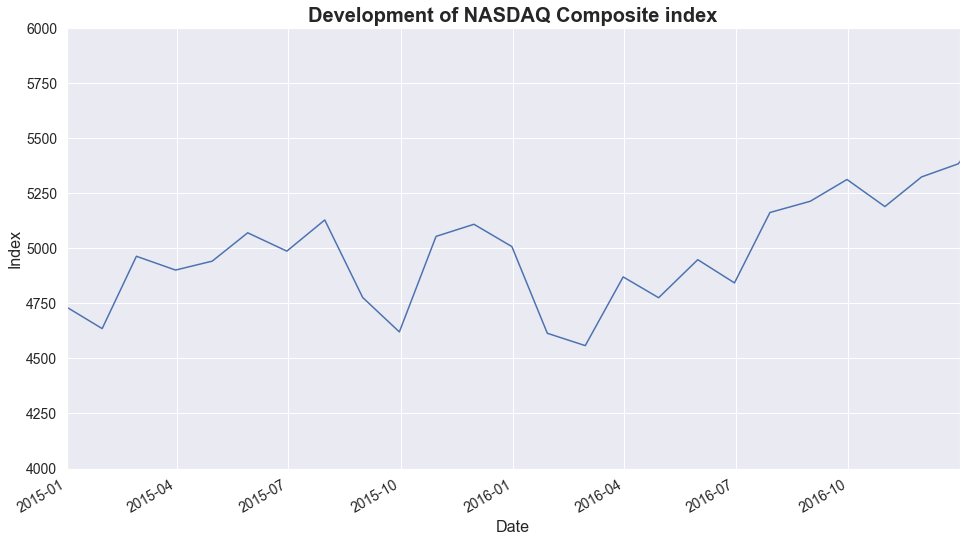

In [34]:
ax_nasdaq = df_stocks['NASDAQ'].plot(figsize=(16,9))

ax_nasdaq.set_title("Development of NASDAQ Composite index", size=20, weight='bold')
ax_nasdaq.set_xlabel('Date', size=16)
ax_nasdaq.set_ylabel("Index", size=16)
ax_nasdaq.tick_params(labelsize=14)
ax_nasdaq.set_ylim(4000,6000)
ax_nasdaq.set_xlim('2015-01-01', '2016-12-31');

When putting .plot() on a dataframe where all the values are in the same axis the library matplotlib will make a line graph of all the columns in the dataframe. 

<AxesSubplot:xlabel='Date'>

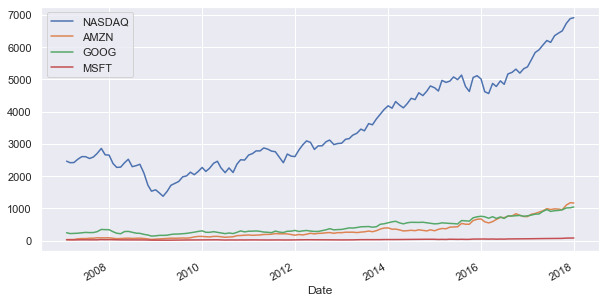

In [35]:
df_stocks.plot()